In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [24]:
# Get only the cubes that have our line of interest in them
mol_tag = 42508
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=6>
    FREQ      ERR    LGINT    DR    ELO     GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l       name       Lab 
    MHz       MHz   MHz nm2        1 / cm          u                                                                                                           
  float64   float64 float64 int64 float64  int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64     str14       bool
----------- ------- ------- ----- -------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- -------------- -----
107146.1725  0.0003 -3.6645     3 133.2671    26    42   508   202     6     5    --    --    --    --     5     5    --    --    --    -- C-13-H3CN, v=0 False
107164.3096  0.0003 -3.3115     3  88.5227    26    42   508   202     6     4    --    --    --    --     5     4    --    --    --    -- C-13-H3CN, v=0 False
 107178.424  0.0003 -2

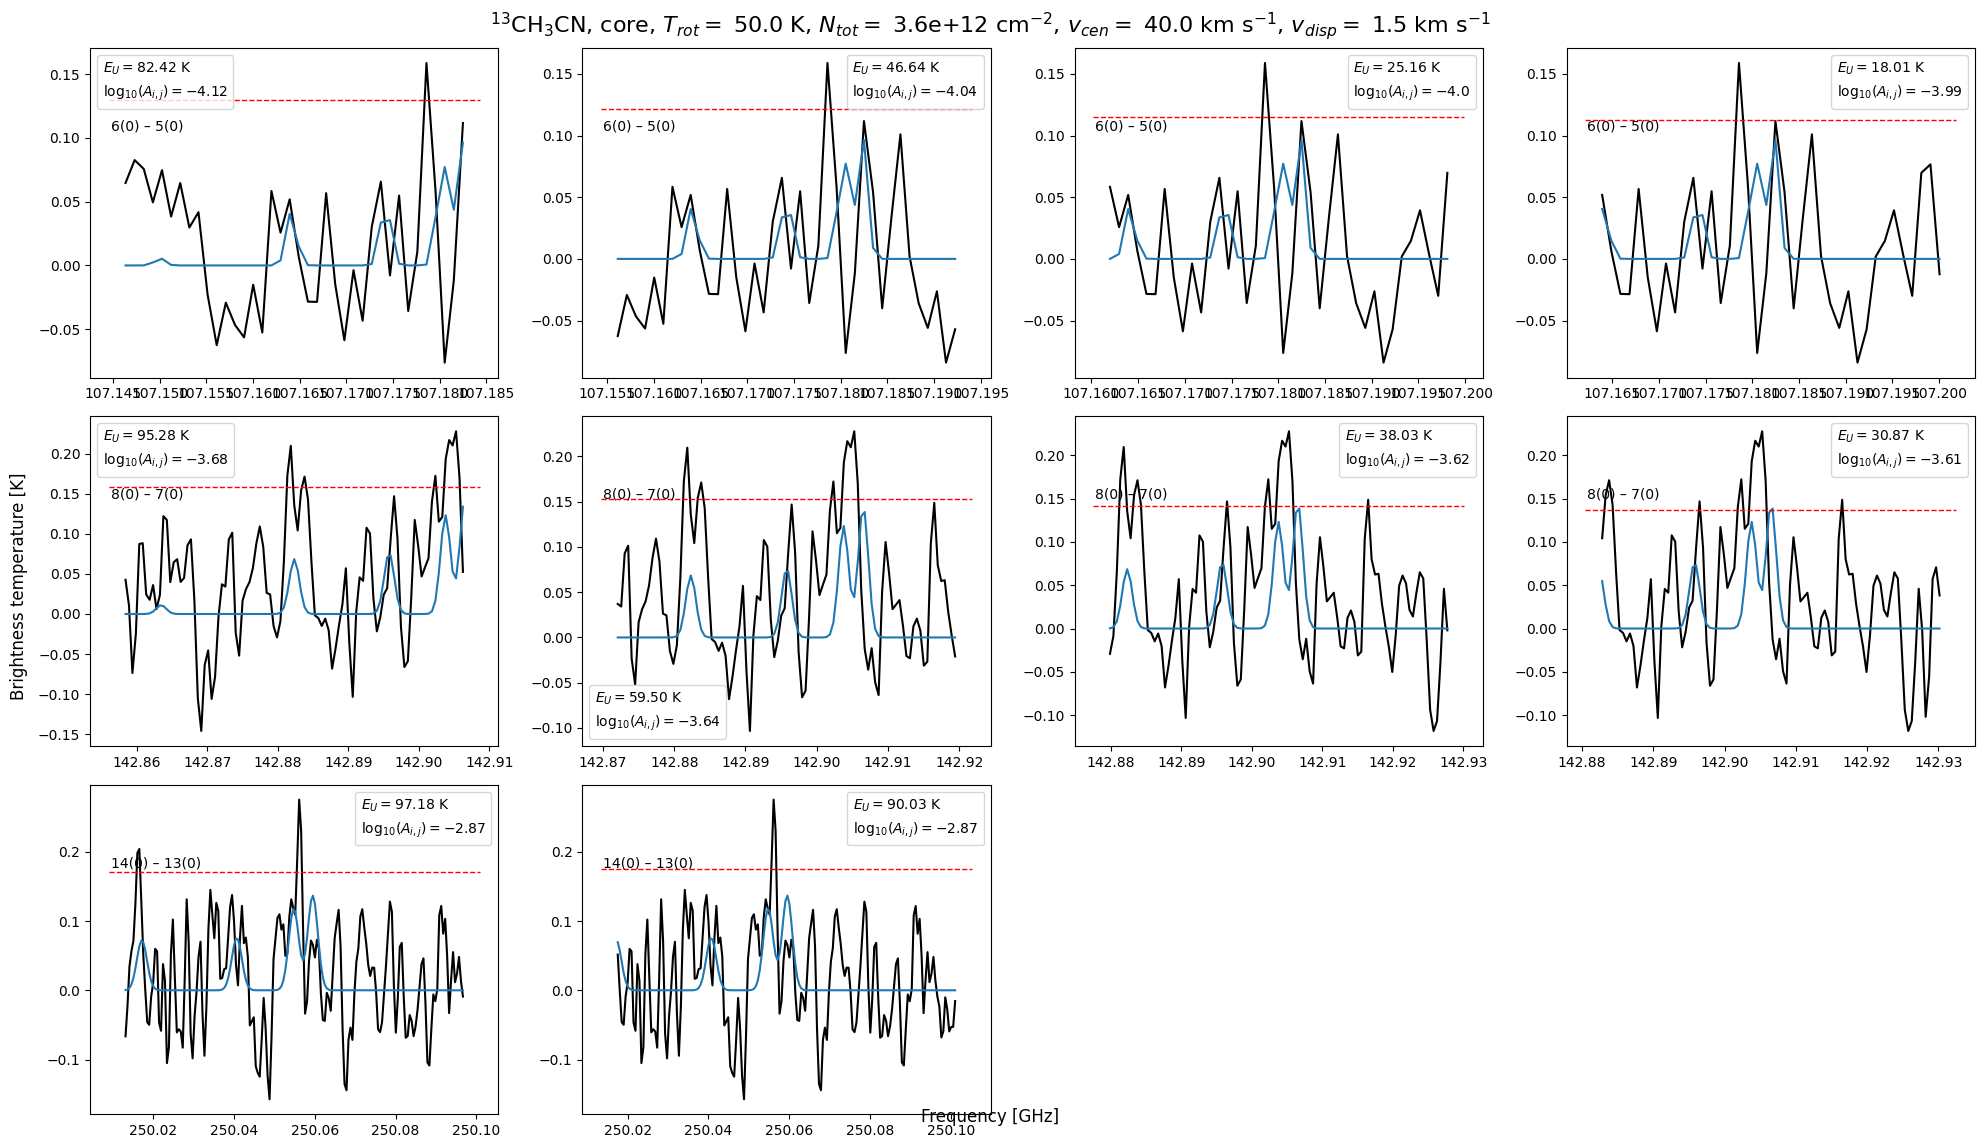

In [10]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 3.6e+12, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=12,
               nrows=3, ncols=4, parse_loc=False, ret_tbl=True, line_by_line=True, name_for_plot=f'$^{{13}}$CH$_3$CN', 
               print_diag=False, extr_type="coord", crd=crd, show_2_sigma=True)

In [11]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

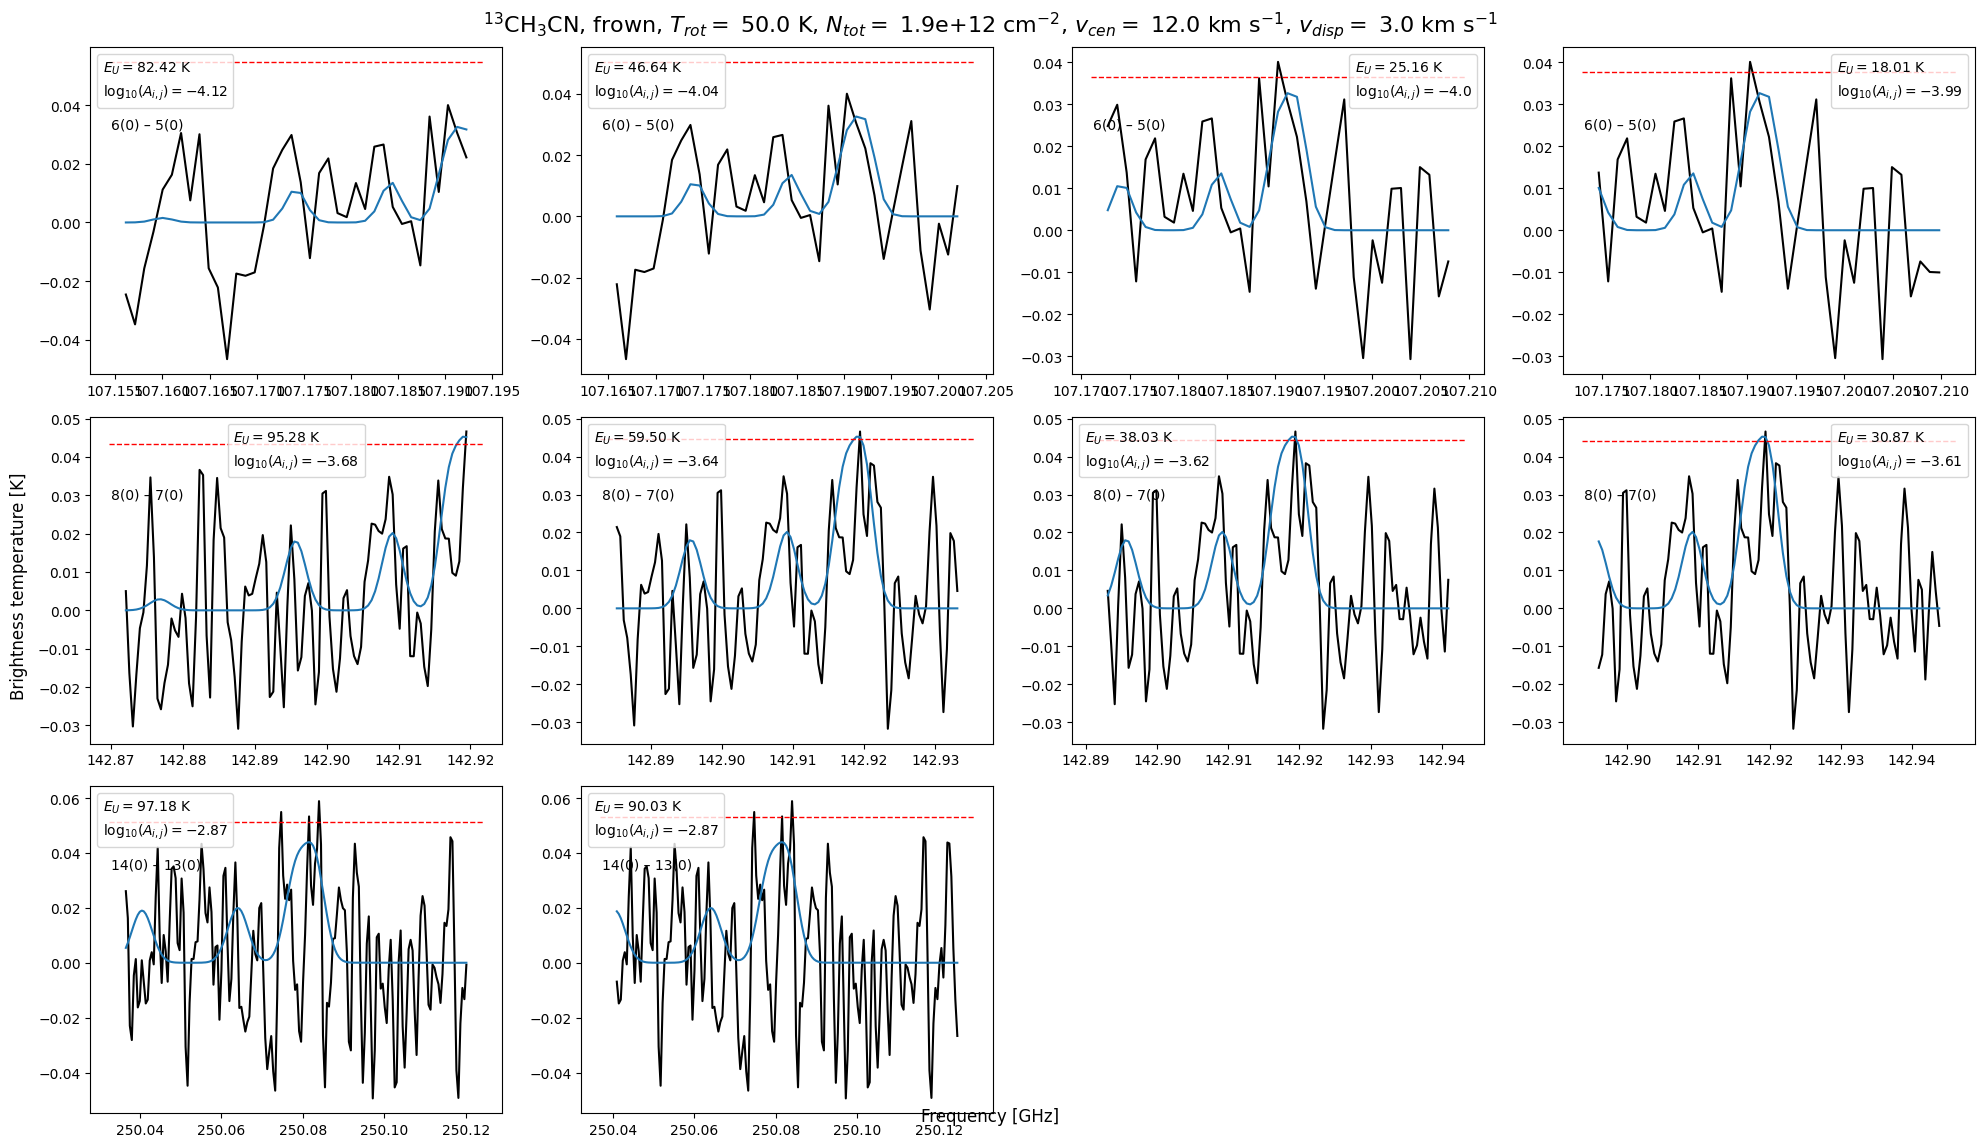

In [19]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 1.9e+12, v_cen = 12.*u.km/u.s, v_disp = 3*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=12, 
                       nrows=3, ncols=4, parse_loc=False, ret_tbl=True, line_by_line=True, name_for_plot=f'$^{{13}}$CH$_3$CN', 
                       extr_type="reg", just_data=False, show_2_sigma=True, return_freqs=True)

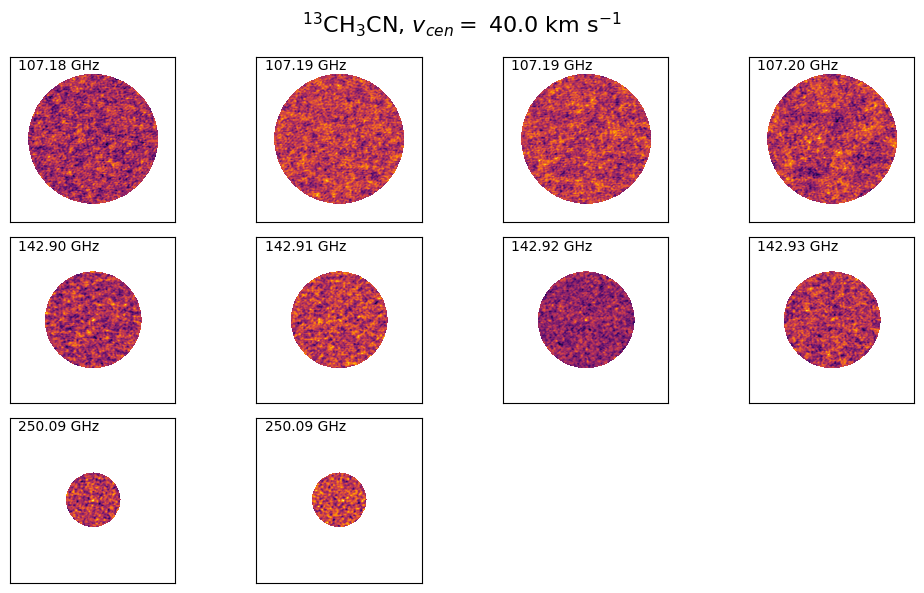

In [22]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40.*u.km/u.s, fig_width=10, fig_height=6, nrows=3, ncols=4, name_for_plot=f'$^{{13}}$CH$_3$CN')

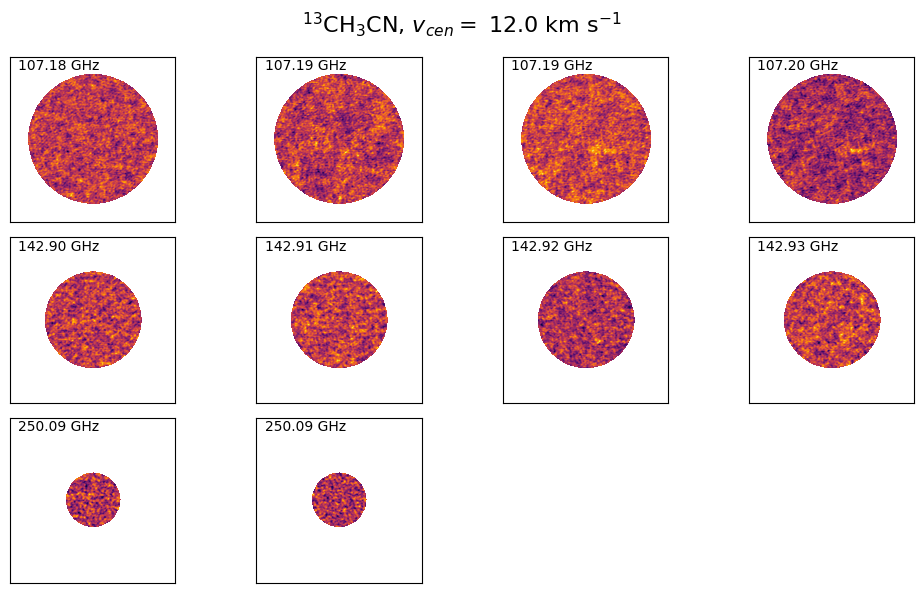

In [23]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12.*u.km/u.s, fig_width=10, fig_height=6, nrows=3, ncols=4, name_for_plot=f'$^{{13}}$CH$_3$CN')